# Predicting Airline Delays

## Airline On-Time Statistics and Delay Causes
### The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

### Here we will look at 2003 data and see if can predict how late flights will be. For this analysis we assume a flight only counts as late if it is more than 30 minutes late.

### Source: http://stat-computing.org/dataexpo/2009/the-data.html

<h7> Shahab Athari, leading Advisor for Control and Economic Analysis in Equinor.com located in Houston, Texas.</h7> 

In [1]:
#Import Python libraries that will be used in this model
%matplotlib inline
from IPython.display import Image
from scipy.stats import randint as sp_randint
from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing, decomposition
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, SelectKBest
#from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score, KFold, cross_val_predict
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from scipy import stats
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import random
import scipy
import seaborn as sns 
import sklearn
import sklearn.cross_validation 
import sklearn.tree
import time
import timeit
import warnings 
warnings.simplefilter('ignore')
sns.set(style="ticks", color_codes=True)

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
path1 = ("C:/Users/aath/Dropbox/MAEN/DS/data/airline/2008.csv")
n = sum(1 for line in open(path1)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
raw = pd.read_csv(path1, skiprows=skip)
raw.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1725.0,1620,1940.0,1850,WN,2803,...,4.0,15.0,0,NaN,0,50.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,2047.0,2005,2209.0,2115,WN,2367,...,7.0,30.0,0,NaN,0,15.0,0.0,12.0,0.0,27.0
2,2008,1,3,4,1928.0,1855,2034.0,2015,WN,298,...,4.0,8.0,0,NaN,0,9.0,0.0,0.0,0.0,10.0
3,2008,1,3,4,922.0,855,1102.0,1000,WN,574,...,4.0,52.0,0,NaN,0,13.0,0.0,35.0,0.0,14.0
4,2008,1,3,4,1331.0,1245,1528.0,1455,WN,2284,...,5.0,11.0,0,NaN,0,4.0,0.0,0.0,0.0,29.0
5,2008,1,3,4,1544.0,1525,1744.0,1740,WN,1063,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1440.0,1425,1655.0,1635,WN,718,...,20.0,10.0,0,NaN,0,2.0,0.0,5.0,0.0,13.0
7,2008,1,3,4,2114.0,2025,2246.0,2155,WN,172,...,7.0,17.0,0,NaN,0,22.0,0.0,2.0,0.0,27.0
8,2008,1,3,4,2052.0,1930,2319.0,2200,WN,163,...,4.0,10.0,0,NaN,0,15.0,0.0,0.0,0.0,64.0
9,2008,1,3,4,1147.0,1145,1417.0,1425,WN,3067,...,8.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
print('Total rows of data:', n)
print('Dataframe dimensions:', raw.shape)

Total rows of data: 7009728
Dataframe dimensions: (100000, 29)


In [4]:
df = raw.copy() # Copy into a new dataframe

In [5]:
# Check the completness of the dataset
null_df = df.isnull().sum(axis=0).reset_index()
null_df.columns = ['variable', 'missing values']
null_df['filling factor (%)']=(df.shape[0]-null_df['missing values'])/df.shape[0]*100
null_df.sort_values('filling factor (%)').reset_index(drop = True).head(20)

,variable,missing values,filling factor (%)
0,CancellationCode,98008,1.992
1,LateAircraftDelay,78233,21.767
2,NASDelay,78233,21.767
3,WeatherDelay,78233,21.767
4,CarrierDelay,78233,21.767
5,SecurityDelay,78233,21.767
6,AirTime,2232,97.768
7,ActualElapsedTime,2232,97.768
8,ArrDelay,2232,97.768
9,ArrTime,2190,97.810


CancellationCode has the largest missing value and we will drop it here. Next five columns miss more than 80% of their values. And since all of these are related to delays we use columns mean values to fill the missing values.

In [6]:
df = df.drop(['CancellationCode'], axis = 1)
df = df.reset_index(drop=True)
df = df.fillna(df.mean())
df = df.drop(['TailNum'], axis = 1)  # Remove TailNum column all together 
df = df.reset_index(drop=True)

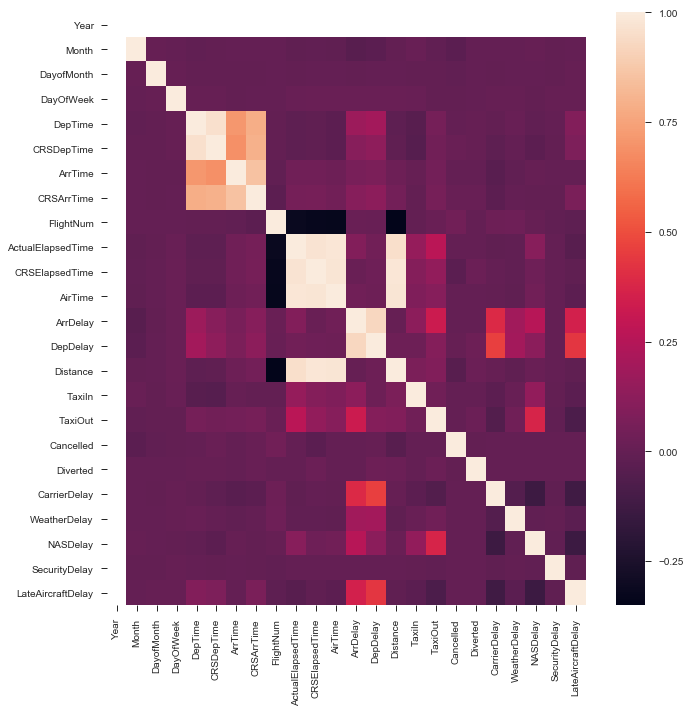

In [7]:
# By using correlation matrix we can start identifying factors that can help to predict lateness  
correlation_mat = df.corr()

#Plot heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation_mat)  # use this if want text added to each box annot=True
plt.tight_layout()
plt.show()

In [8]:
#Drop Variables which do not have correlation with arrival delays/cannot be predicted until the flight
df.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum',
         'Cancelled', 'Diverted', 'SecurityDelay'],axis=1, inplace=True)
df = df.reset_index(drop=True)

In [9]:
# Check the data type of each column by groupby
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['CRSDepTime', 'CRSArrTime', 'Distance'], dtype='object'),
 dtype('float64'): Index(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
        'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
        'WeatherDelay', 'NASDelay', 'LateAircraftDelay'],
       dtype='object'),
 dtype('O'): Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')}

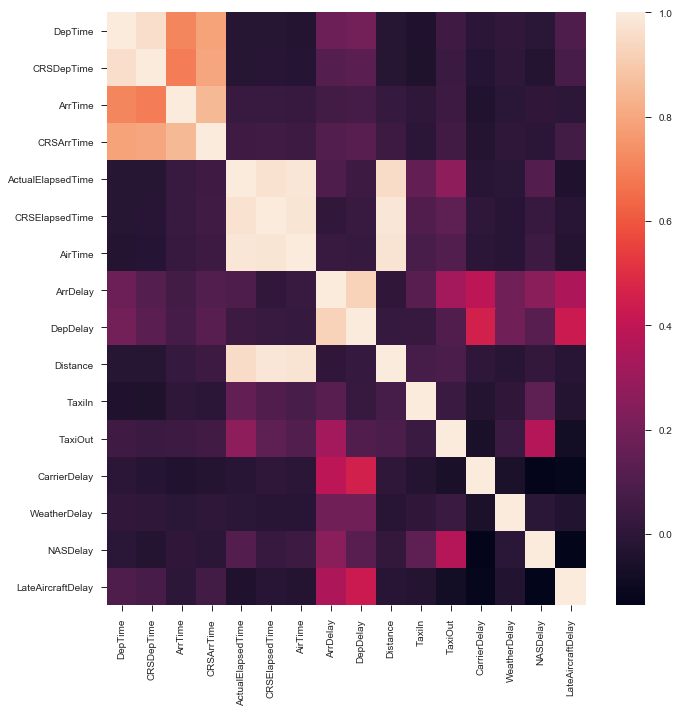

In [10]:
# Revisit the heatmap once more
# By using correlation matrix we can start identifying factors that can help to predict lateness  
correlation_mat = df.corr()

#Plot heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation_mat)  # use this if want text added to each box annot=True
plt.tight_layout()
plt.show()

In [11]:
df[['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 
    'Distance']] = df[['CRSDepTime', 'CRSArrTime', 
                       'CRSElapsedTime', 'Distance']].values.astype(float)

In [12]:
# Group and aggreate delay values for airlines. 
df.groupby(['UniqueCarrier'])\
                      .agg({'ArrDelay':['min', 'max', 'mean', 'count'],
                            'DepDelay':['min', 'max', 'mean']}).astype(int)

ArrDelay                   DepDelay           
                   min   max mean  count      min   max mean
UniqueCarrier                                               
9E                 -55   462    4   3791      -29   452    6
AA                 -57  1088   12   8514      -19  1092   13
AQ                 -40    64   -3    122      -18    58   -2
AS                 -47   301    4   2172      -33   291    6
B6                 -55   626   11   2801      -23   629   12
CO                 -49   666   11   4278      -25   685   13
DL                 -53   337    7   6374      -21   340    7
EV                 -41   657   10   4073      -35   650   12
F9                 -51   484    6   1385      -15   482    6
FL                 -48   362    9   3769      -34   370    9
HA                 -43   309    0    875      -27   295    0
MQ                 -56   898    9   7076      -25   892   10
NW                 -43  2453    7   4842      -22  2467    6
OH                 -58   471   12   2795      -25   410   11
OO                 -43   701    6   8124      -33   697    7
UA                 -58   759   12   6386      -18   758   15
US                 -47   876    3   6359      -21   886    6
WN                 -53   602    5  17335      -13   620   10
XE                 -59   439    9   5298      -18   472   10
YV                 -44   433   12   3631      -45   435   12

In [13]:
# Group and aggreate delay values for airlines. 
df.groupby(['Origin'])\
                      .agg({'ArrDelay':['min', 'max', 'mean', 'count'],
                            'DepDelay':['min', 'max', 'mean']})

ArrDelay                              DepDelay                      
            min         max       mean count      min        max       mean
Origin                                                                     
ABE       -29.0  187.000000   6.906019    74    -15.0  200.00000   6.613247
ABI       -20.0  541.000000  12.838528    35    -12.0  539.00000  16.346479
ABQ       -30.0  357.000000   2.337182   559    -14.0  360.00000   5.438534
ABY       -24.0   71.000000   1.000000    16    -10.0   67.00000   1.062500
ACK       -16.0    8.348478  -5.930304     5     -5.0   10.12675   4.225350
ACT       -17.0   12.000000  -5.156250    32     -8.0   15.00000  -1.218750
ACV       -24.0  192.000000  18.053375    44    -19.0  163.00000  13.821062
ACY        -4.0   -4.000000  -4.000000     1      5.0    5.00000   5.000000
ADK       -39.0  -27.000000 -33.000000     2    -33.0  -19.00000 -26.000000
ADQ       -21.0   57.000000   6.625000     8    -16.0   54.00000   9.750000
AEX       -21.0  237.000000  12.483871    31    -11.0  183.00000  10.354839
AGS       -27.0   42.000000  -3.105263    38    -10.0   39.00000   0.157895
AKN         8.0   14.000000  11.000000     2      8.0   13.00000  10.500000
ALB       -41.0  213.000000   5.008756   199    -16.0  182.00000   6.927808
ALO        -4.0  150.000000  38.837120     4     -7.0  132.00000  32.781687
AMA       -19.0  292.000000   5.875406   112    -10.0  236.00000   7.082621
ANC       -47.0  372.000000   2.843077   297    -16.0  377.00000   5.488642
ASE       -22.0  174.000000  10.296037    78    -14.0  168.00000  10.727699
ATL       -42.0  362.000000  10.428847  5952    -34.0  370.00000  11.399470
ATW       -24.0  203.000000   7.591732    92    -15.0  200.00000   7.574861
AUS       -37.0  210.000000   5.702466   703    -12.0  216.00000   6.823994
AVL       -32.0  223.000000  -2.226768    60    -14.0  210.00000   2.939671
AVP       -28.0  212.000000  13.618256    41    -10.0  201.00000  16.320165
AZO       -26.0  244.000000   2.000000    60    -14.0  233.00000   2.716667
BDL       -47.0  373.000000   7.624856   420    -13.0  366.00000  10.099732
BET       -19.0   90.000000   8.923077    13    -16.0   89.00000   9.846154
BFL       -33.0   32.000000  -5.020833    48    -12.0   23.00000  -3.562500
BGM       -20.0   19.000000  -4.865152    10     -8.0   31.00000   0.012675
BGR       -24.0  271.000000  26.341077    45    -29.0  195.00000  22.247261
BHM       -33.0  170.000000   5.112130   337    -29.0  166.00000   6.326451
...         ...         ...        ...   ...      ...        ...        ...
SPI       -27.0  224.000000  25.000000    11    -16.0  224.00000  27.454545
SPS       -25.0  152.000000   8.936480    26     -9.0  149.00000  12.543337
SRQ       -30.0  234.000000  12.079208   101    -13.0  248.00000  11.821782
STL       -46.0  331.000000   8.491314   860    -15.0  444.00000  10.431559
STT       -30.0   61.000000  -0.448276    29    -15.0   53.00000   1.068966
STX       -15.0   17.000000   1.750000     4     -9.0    3.00000  -4.250000
SUN       -31.0   15.000000  -8.832935    38    -20.0   11.00000  -4.786138
SUX       -12.0   -8.000000 -10.000000     2    -10.0   -6.00000  -8.000000
SWF       -30.0  156.000000   3.789372    71    -18.0  120.00000   5.202539
SYR       -40.0  181.000000   5.702958   167    -22.0  174.00000   5.931180
TEX       -17.0   19.000000   3.750000     4     -5.0   15.00000   2.250000
TLH       -26.0  444.000000  14.228012    82    -15.0  401.00000  14.076262
TOL       -28.0  229.000000  19.090326    26    -14.0  213.00000  20.312567
TPA       -39.0  355.000000   6.585605  1214    -15.0  292.00000   8.970984
TRI       -35.0  219.000000  15.333333    30    -10.0  205.00000  14.633333
TUL       -28.0  282.000000   4.960047   347    -17.0  262.00000   6.207533
TUS       -34.0  266.000000   3.550113   374    -15.0  270.00000   5.062853
TVC       -31.0  335.000000  14.901031    47    -17.0  319.00000  13.385676
TWF       -23.0   60.000000   2.367424    20    -15.0  

In [14]:
# Define lateness as 30 minitues or more lateness beyond scheduled arrival time
df['ArrLate'] =  df['ArrDelay'].apply(lambda x: 0 if x<30 else 1)

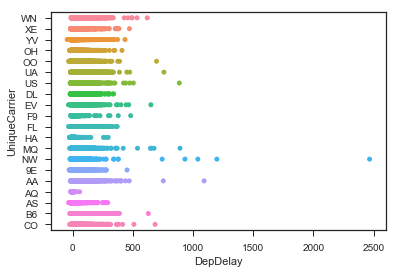

In [15]:
# Show departure delays per airlines
ax = sns.stripplot(y=df['UniqueCarrier'], x=df['DepDelay'])

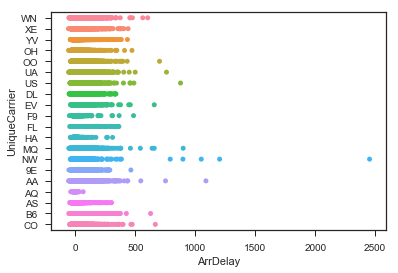

In [16]:
# Show arrival delays per airlines
ax = sns.stripplot(y=df['UniqueCarrier'], x=df['ArrDelay'])

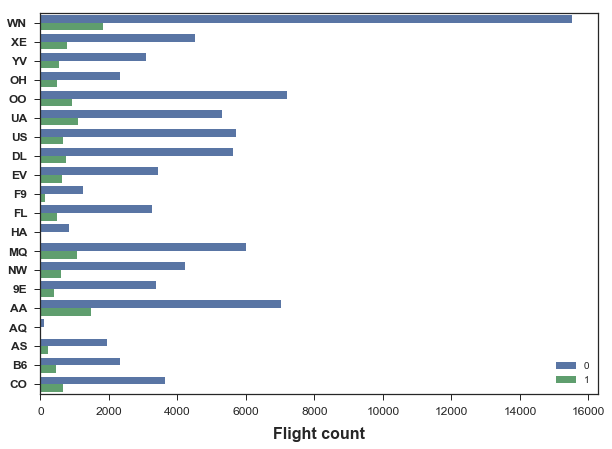

In [17]:
# By assuming lateness = 30 minutes, below we group being late = 0 otherwise = 1

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y=df['UniqueCarrier'], hue='ArrLate', data=df)
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0)
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
plt.show()

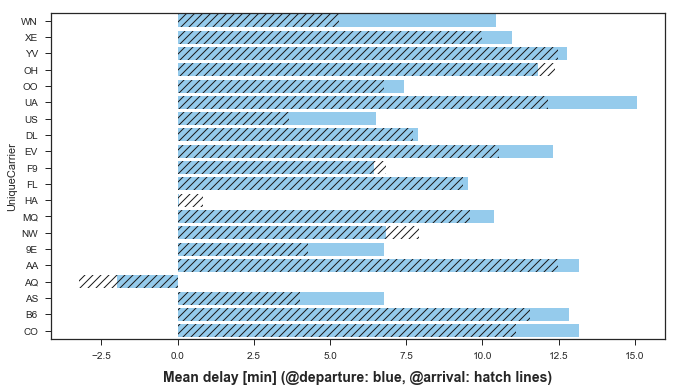

In [18]:
# Showing mean delays both for arrivales and departures 

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DepDelay", y="UniqueCarrier", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ArrDelay", y="UniqueCarrier", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
#ax.set_yticklabels(labels)
#ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

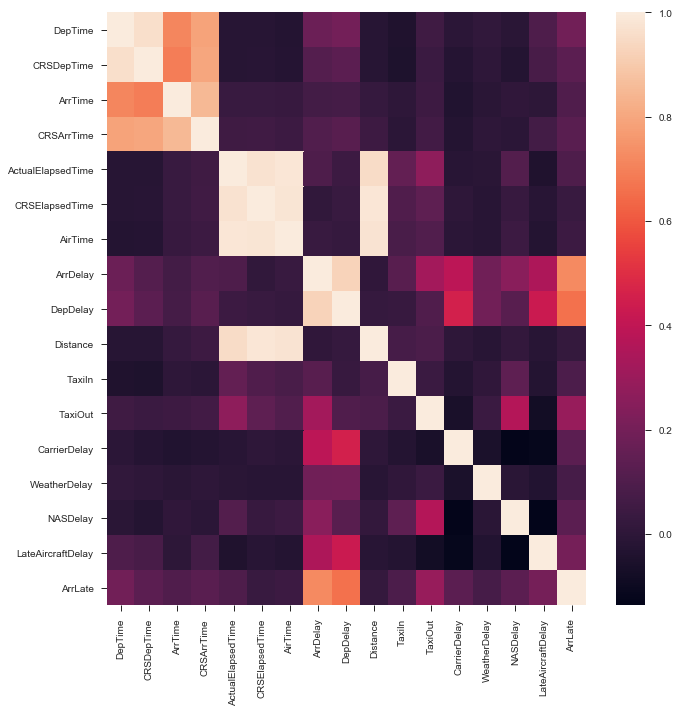

In [19]:
# By using correlation matrix we can start identifying factors that can help to predict lateness  
correlation_mat = df.corr()

#Plot heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation_mat)  # use this if want text added to each box annot=True
plt.tight_layout()
plt.show()

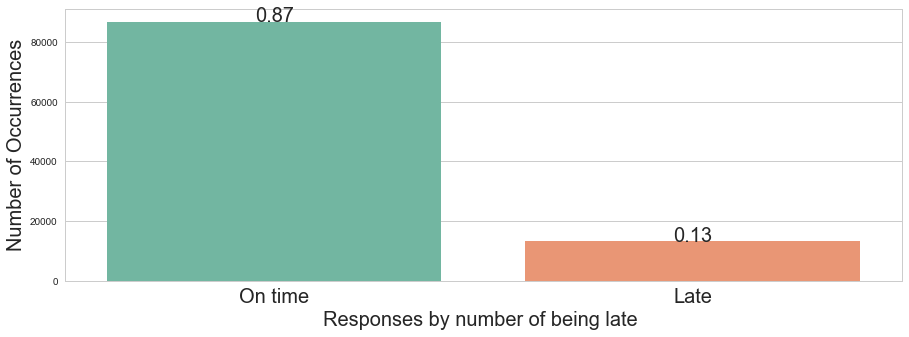

In [20]:
# To show is there is any imbalance in first 50,000 data
plt.figure(figsize=(15, 5))
fontsize=20
sns.set_style("whitegrid")
plt.subplot(1, 1, 1)
ax = sns.countplot(x="ArrLate", data=df, palette="Set2")
ax.set_xlabel('Responses by number of being late ',fontsize=fontsize)
ax.set_ylabel('Number of Occurrences', fontsize=fontsize)
ax.set_xticklabels(['On time','Late'], fontsize=fontsize)

# Use below function to calcualte the percentage for each bar
total = float(len(df)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),fontsize=fontsize, ha="center") 
    
#plt.ylim(0, 50000)  # Use this if want to limit to 50000 observation only

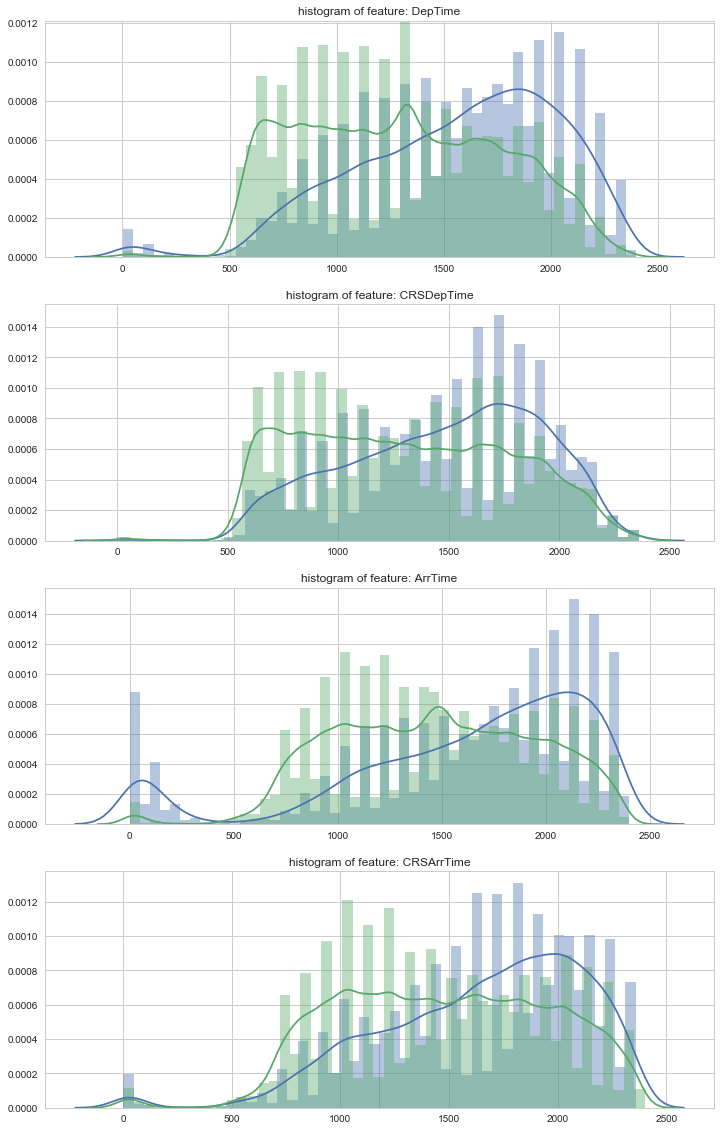

In [21]:
# let's draw the histogram for first five features:
current_palette = sns.color_palette()
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(4, 1)
for i, cn in enumerate(df.columns[:4]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.ArrLate == 1], bins=50)
    sns.distplot(df[cn][df.ArrLate == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

# Above code will raise a warning related to deprecated function. And to avoid seeing this warning
# we suppress it using: 
warnings.simplefilter('ignore')

Histograms of the first four features show that arrival delays are more frequent during later hours of the day. This make sense as delays will have ripple effects on other schedules during of the day. 

In [178]:
# To save time and gain speed make a copy of previous df to new dataframe
df1 = df.copy()

In [179]:
df1.shape

(100000, 20)

In [180]:
# Extract selective columns for normanlization
df2 = df1[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
        'CarrierDelay', 'WeatherDelay', 'LateAircraftDelay','ArrLate']]

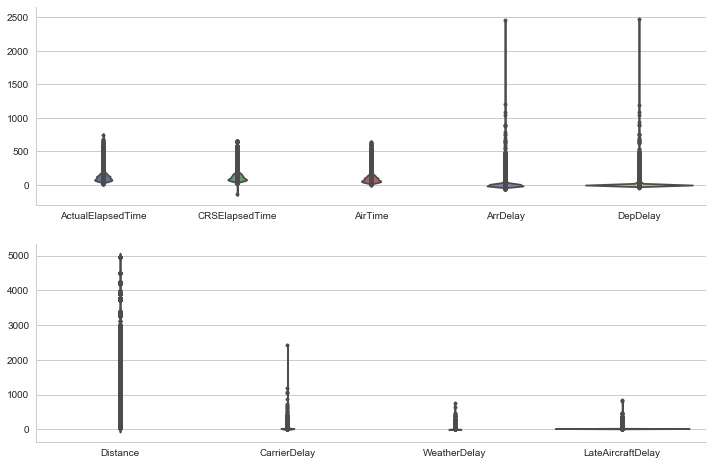

In [181]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Tell pointplot to plot on ax1 with the ax argument
sns.violinplot(data=df2.ix[:,0:5], inner="points", ax=ax1)    
sns.violinplot(data=df2.ix[:,5:9], inner="points", ax=ax2)
fig.set_size_inches(12, 8)
sns.despine()

In [182]:
# Filter away all outliers identified as those within +/-3 standard deviations in ArrDelay and DepDelay
df2 = df2[np.abs(df2.ArrDelay-df2.ArrDelay.mean()) <= (3*df2.ArrDelay.std())]
df2 = df2[np.abs(df2.DepDelay-df2.DepDelay.mean()) <= (3*df2.DepDelay.std())]

In [183]:
# Filter away all outliers identified as those within +/-3 standard deviations in ArrDelay and DepDelay
df1 = df1[np.abs(df1.ArrDelay-df1.ArrDelay.mean()) <= (3*df1.ArrDelay.std())]
df1 = df1[np.abs(df1.DepDelay-df1.DepDelay.mean()) <= (3*df1.DepDelay.std())]

In [269]:
df1.shape, df2.shape

((95028, 20), (95028, 10))

In [270]:
df1.head(3)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,ArrLate
0,1725.0,1620.0,1940.0,1850.0,WN,135.0,150.0,116.0,50.0,65.0,LAS,GEG,806.0,4.0,15.0,50.0,0.0,0.0,0.0,1
1,2047.0,2005.0,2209.0,2115.0,WN,82.0,70.0,45.0,54.0,42.0,LAS,LAX,236.0,7.0,30.0,15.0,0.0,12.0,27.0,1
2,1928.0,1855.0,2034.0,2015.0,WN,66.0,80.0,54.0,19.0,33.0,LAS,RNO,345.0,4.0,8.0,9.0,0.0,0.0,10.0,0


In [271]:
df2.head(2)

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,LateAircraftDelay,ArrLate
0,135.0,150.0,116.0,50.0,65.0,806.0,50.0,0.0,0.0,1
1,82.0,70.0,45.0,54.0,42.0,236.0,15.0,0.0,27.0,1


In [272]:
# Extract selective columns for normanlization
df_for_norm = df1[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
                   'Distance','CarrierDelay', 'WeatherDelay', 'LateAircraftDelay']]
df_class = df1[['ArrLate']]

df_rem = df1.drop(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
                   'Distance','CarrierDelay', 'WeatherDelay', 'LateAircraftDelay', 'ArrLate'], axis=1)

df_for_norm = df_for_norm.reset_index(drop=True)
df_class = df_class.reset_index(drop=True)
df_rem = df_rem.reset_index(drop=True)

In [273]:
df_for_norm.shape

(95028, 9)

Based on above we should remove outliers from ArrDelay and DepDelay features. 

In [274]:
# # Drop previous normalized colums then left with remaining
# df_rem = df1.drop(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
#         'CarrierDelay', 'WeatherDelay', 'LateAircraftDelay', 'ArrLate'], axis=1)
# df_rem = df_rem.reset_index(drop=True)

In [275]:
# Inspect the headings of these dataframes
df_for_norm.head(3)

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,LateAircraftDelay
0,135.0,150.0,116.0,50.0,65.0,806.0,50.0,0.0,0.0
1,82.0,70.0,45.0,54.0,42.0,236.0,15.0,0.0,27.0
2,66.0,80.0,54.0,19.0,33.0,345.0,9.0,0.0,10.0


In [276]:
df_rem.head(3)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,Origin,Dest,TaxiIn,TaxiOut,NASDelay
0,1725.0,1620.0,1940.0,1850.0,WN,LAS,GEG,4.0,15.0,0.0
1,2047.0,2005.0,2209.0,2115.0,WN,LAS,LAX,7.0,30.0,12.0
2,1928.0,1855.0,2034.0,2015.0,WN,LAS,RNO,4.0,8.0,0.0


In [277]:
df_class.head(3)

,ArrLate
0,1
1,1
2,0


In [278]:
# Inspect the shape
df_for_norm.shape, df_rem.shape, df_class.shape

((95028, 9), (95028, 10), (95028, 1))

In [279]:
# Normalize selective columns

col_name = df_for_norm.columns # Keep a copy of column names
min_max_scaler = preprocessing.MinMaxScaler() # Create a minimum and maximum processor object

# Create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df_for_norm)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)

df_normalized.columns = [col_name] # Add back column names 

In [280]:
# Inspect the data type
df_normalized.dtypes.index

MultiIndex(levels=[['ActualElapsedTime', 'AirTime', 'ArrDelay', 'CRSElapsedTime', 'CarrierDelay', 'DepDelay', 'Distance', 'LateAircraftDelay', 'WeatherDelay']],
           labels=[[0, 3, 1, 2, 5, 6, 4, 8, 7]])

In [281]:
# Need to flatten the level of this dataframe
df_normalized.columns = df_normalized.columns.get_level_values(0)

In [282]:
# Check the column headings
df_normalized.head(2), df_normalized.shape

(   ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance  \
 0           0.178411        0.210526  0.180967  0.592391  0.948276  0.157169   
 1           0.098951        0.086687  0.070203  0.614130  0.750000  0.041574   
 
    CarrierDelay  WeatherDelay  LateAircraftDelay  
 0      0.450450           0.0           0.000000  
 1      0.135135           0.0           0.257143  , (95028, 9))

In [283]:
# Inspect the table
df_rem.head(2), df_rem.shape

(   DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier Origin Dest  TaxiIn  \
 0   1725.0      1620.0   1940.0      1850.0            WN    LAS  GEG     4.0   
 1   2047.0      2005.0   2209.0      2115.0            WN    LAS  LAX     7.0   
 
    TaxiOut  NASDelay  
 0     15.0       0.0  
 1     30.0      12.0  , (95028, 10))

In [284]:
# After normalization we combine the tables into one 
features_only = pd.merge(df_normalized, df_rem, right_index=True, left_index=True)

In [285]:
# Check it again
features_only.head(2), features_only.shape

(   ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance  \
 0           0.178411        0.210526  0.180967  0.592391  0.948276  0.157169   
 1           0.098951        0.086687  0.070203  0.614130  0.750000  0.041574   
 
    CarrierDelay  WeatherDelay  LateAircraftDelay  DepTime  CRSDepTime  \
 0      0.450450           0.0           0.000000   1725.0      1620.0   
 1      0.135135           0.0           0.257143   2047.0      2005.0   
 
    ArrTime  CRSArrTime UniqueCarrier Origin Dest  TaxiIn  TaxiOut  NASDelay  
 0   1940.0      1850.0            WN    LAS  GEG     4.0     15.0       0.0  
 1   2209.0      2115.0            WN    LAS  LAX     7.0     30.0      12.0  ,
 (95028, 19))

In [286]:
# Create binary data for categorial data
features_only = pd.get_dummies(features_only,columns=['UniqueCarrier'], drop_first=True)
features_only = pd.get_dummies(features_only,columns=['Origin'], drop_first=True)
features_only = pd.get_dummies(features_only,columns=['Dest'], drop_first=True)

In [287]:
# Inspect again
features_only.head(2), features_only.shape # Check the result

(   ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance  \
 0           0.178411        0.210526  0.180967  0.592391  0.948276  0.157169   
 1           0.098951        0.086687  0.070203  0.614130  0.750000  0.041574   
 
    CarrierDelay  WeatherDelay  LateAircraftDelay  DepTime    ...     Dest_TYR  \
 0      0.450450           0.0           0.000000   1725.0    ...            0   
 1      0.135135           0.0           0.257143   2047.0    ...            0   
 
    Dest_TYS  Dest_VLD  Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  Dest_YAK  \
 0         0         0         0         0         0         0         0   
 1         0         0         0         0         0         0         0   
 
    Dest_YKM  Dest_YUM  
 0         0         0  
 1         0         0  
 
 [2 rows x 628 columns], (95028, 628))

In [288]:
# #PCA Analysis
# # Build the correlation mtarix
# correlation_matrix = features_only.corr()

# #Calculate the eigenvectores & eigenvalues
# eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)
# sklearn_pca = PCA(n_components= 2) #len(features_only.columns))
# Y_sklearn = sklearn_pca.fit_transform(correlation_matrix)

# print(pca.explained_variance_ratio_) 

# # #Plot the scree plot for visual analysis of the PCA features
# # plt.title('Scree Plot')
# # plt.plot(eig_vals)
# # plt.show()

# # #For additional aid, print the total variance explained by each of the eigenvalues
# # print('The percentage of total variance in the dataset explained \n', sklearn_pca.explained_variance_ratio_)

## Principla Component Analysis

In [289]:
# # We have over 600 columns of features and next we will use principal component analysis (PCA) 
# # as a technique, to reduce the number of features. 
# # By using PCA we can rank most important features capable of explaining the total variance by the data.
# # With PCA we can determine which features capture similiar information and discard them to create a more lean model.

# covar_matrix = PCA(n_components = 4) # Selecting n_components PCA factors
# covar_matrix.fit(features_only)
# variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
# var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100) # Calcualte the cumulative variance
# var

In [290]:
# # Showing the top PCA features explaining almost all of total variance
# df_pca = pd.DataFrame(pca.components_,columns=features_only.columns,index = ['PC-1','PC-2', 'PC-3'])

# # Below show the correlation between each feature and principla components
# # Getting the columns with max values contributions to PCAs
# #df_pca.ix[:, df_pca.max().sort_values(ascending=False).index]

In [291]:
# Getting the columns with max values contributions to PCAs
#df_pca.ix[:, df_pca.max().sort_values(ascending=False).index]

In [292]:
# Principal component
n_components = 3
covar_matrix = PCA(n_components = n_components) # Selecting n_components PCA factors
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(features_only)
X_pca = pd.DataFrame(X_pca, columns=['PC-1', 'PC-2','PC-3']) 

covar_matrix.fit(features_only)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var2 = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100) # Calcualte the cumulative variance
var2

array([87.5, 97.4, 99.5])

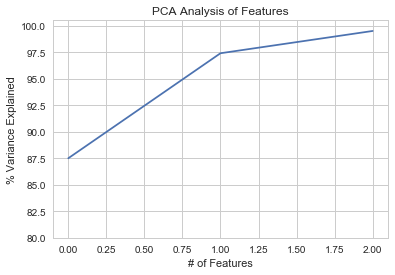

In [293]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis of Features')
plt.ylim(80,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var2) # Showing the cumulative contributions of PCAs

In [294]:
df_pca = pd.DataFrame(pca.components_,columns=features_only.columns,index = ['PC-1', 'PC-2','PC-3'])
df_pca.ix[:, df_pca.max().sort_values(ascending=False).index]

,ArrTime,CRSDepTime,DepTime,NASDelay,TaxiIn,Origin_ATL,UniqueCarrier_WN,ArrDelay,DepDelay,UniqueCarrier_MQ,...,ActualElapsedTime,Distance,CRSElapsedTime,Origin_PHX,Origin_MSP,Origin_ORD,Origin_IAH,Origin_DEN,TaxiOut,CRSArrTime
PC-1,-0.502233,-0.492149,-0.495558,0.000504,0.000157,-0.000014,-0.000006,-0.000015,-0.000027,0.000005,...,-0.000001,-0.000002,-0.000002,-0.000003,-0.000005,-0.000006,-0.000007,-0.000009,-0.000534,-0.509875
PC-2,-0.565224,0.509701,0.496313,-0.001315,-0.001175,0.000044,0.000016,0.000008,0.000021,0.000015,...,-0.000039,-0.000037,-0.000040,-0.000017,-0.000007,-0.000014,-0.000011,-0.000010,-0.001099,-0.417607
PC-3,0.648641,-0.031337,0.142335,-0.000286,0.000059,0.000005,0.000043,0.000038,0.000030,0.000030,...,-0.000028,-0.000035,-0.000036,-0.000009,-0.000012,-0.000019,-0.000007,-0.000023,-0.000227,-0.747009


### Above shows that ArrTime and CRSDepTime and DepTim are the features with most contributions to PCAs

In [295]:
# Becasue of high computational cost we will use only a random sample 
# from previous balanced dataset for futher analysis
small_sample_size = 70000
df_pca_sample=X_pca.sample(n=small_sample_size, random_state=2)
df_class=df_class.sample(small_sample_size, random_state=2)

In [296]:
X_pca.shape, df_pca_sample.shape, df_class.shape # Check the dimensions

((95028, 3), (70000, 3), (70000, 1))

In [297]:
#Describe the data using statistics
df_pca_sample.describe()

,PC-1,PC-2,PC-3
count,70000.000000,70000.000000,70000.000000
mean,0.283858,-0.245602,-0.006275
std,887.986067,296.921381,137.484513
min,-1863.518564,-1227.900689,-1585.558866
25%,-725.644089,-89.629170,-13.010913
50%,17.052971,-3.002484,2.729965
75%,750.838910,53.083782,17.085273
max,2472.106594,2453.650322,1805.460597


### Model Selection ###

We split the dataset 80/20 between train and test parts. We will train and fit multiple models using the training set and do evaluation of their predictive power using the test data. Splitting the dateset is the critical strategy for reducing the risk of overfitting.

We also tune the hyperparameters of all models to improve their prediction powers. And confusion matrix to demonstrate characteristics such as accuracy, sensitivity/recall, specificity, false positive rate and precision.

As the purpose of the analysis is to predict the rare cases of fraud we will focus on sensitivity or recall as the main evaluation metric. Also, false negative in this case are more important as false positives (normal transactions that are marked as possible fraud) are more acceptable than false negatives where actual fraud has happened and we fail to detect. 

We tested following models:

  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Naive - Bayes (Bernoulli)
  - KNeighbors Classifier
  - Support Vector Machine
  - Gradient Boosting Classifier

Both classes of no fraud or fraud are labled as 0 and 1.

### Training and testing set preparation
Priot to model selection we need to split the data into training, development and test set. We are using first 80% of the data as the training and validation set. The remaining 20% will be used as the testing set:

In [298]:
# Creating training and test data set

df_features_pick = df_pca_sample #features_only  # Have an option to pick normalized df or a PCA version X_pca

sample = np.random.rand(len(df_features_pick)) < 0.8 # Use random sampling of 80
train_x = df_features_pick[sample]
test_x = df_features_pick[~sample]
train_y = df_class.iloc[sample,0]
test_y = df_class.iloc[~sample,0]

CF_no = 5  # Number of cross validation used for all models

In [299]:
df_features_pick.shape

(70000, 3)

In [300]:
total_size = df_features_pick.shape
train_x_size = train_x.shape
train_y_size = train_y.shape
test_x_size = test_x.shape
test_y_size = test_y.shape

print("Size of total sample: {}. ".format(total_size)) 
print("Size of training x: {}. ".format(train_x_size)) 
print("Sizae of training y: {}. ".format(train_y_size))
print("Size of test x: {}. ".format(test_x_size)) 
print("Size of test y: {}. ".format(test_y_size))

Size of total sample: (70000, 3). 
Size of training x: (55961, 3). 
Sizae of training y: (55961,). 
Size of test x: (14039, 3). 
Size of test y: (14039,). 


## Model Training: Logistic Regression

In [302]:
#Start the timer as a measure of the computing effort
start_time = time.time()

# Check any overfitting problem using Cross Fold validation
log_reg = sklearn.linear_model.LogisticRegression()
score = sklearn.cross_validation.cross_val_score(log_reg, train_x, train_y, cv=CF_no)
print(score)

[0.91 0.91 0.91 0.91 0.91]


In [303]:
#Tune parameters
# C parameter
c_param = [0.1,0.5,1, 2, 5, 10]

#Tune the type of penalty used between l1 and l2
penalty_type = ['l1','l2']
parameters = {'C': c_param, 'penalty': penalty_type}

#Fit parameters
%timeit  
log_reg_tuned = GridSearchCV(log_reg, param_grid=parameters, cv=CF_no)

#Fit the tuned classifier in the training space
log_reg_tuned.fit(train_x, train_y)

#Print the best parameters
print(log_reg_tuned.best_params_)

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

{'C': 0.1, 'penalty': 'l1'}
--- 8 seconds ---


In [304]:
# Check the prediction power of the model
pred_y = np.array(log_reg_tuned.predict(test_x))
true_y = np.array(test_y)

### Evaluating the model
Below we will use the confusion matrix which is a way of tabulating the number of misclassifications. Also, we can see the number of predicted classes which were categorized wrongly as true. But before that we need to set up a function that also plots the outcome of this matrix.

In [305]:
# A function to create confusion matrix. Part 1 of 2
# This is part 1 that can be used for all models. Part 2 depends on model specific data

import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['On Time', 'Late'] # Use this global variable for classification variable names

Confusion matrix, without normalization
[[12788     0]
 [ 1251     0]]


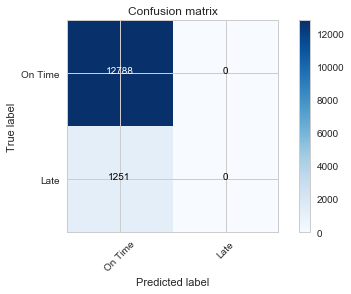

In [306]:
# A function to create confusion matrix. Part 2 of 2
#class_names = ['Labeled 0', 'Labeled 1']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

In [307]:
target_names = class_names
print(classification_report(true_y, pred_y, target_names=target_names))

             precision    recall  f1-score   support

    On Time       0.91      1.00      0.95     12788
       Late       0.00      0.00      0.00      1251

avg / total       0.83      0.91      0.87     14039



In [308]:
# Metrics computed from a confusion matrix
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

print("===================================================")

print("Overall, how often is the classifier correct (accuracy)? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct (precision)? {}.".format(TP / float(TP + FP))) 

True Positives (TP): We correctly predicted the fraud: 0. 
True Negatives (TN): we correctly predicted that no fraud: 12788. 
False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: 0. 
False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: 1251. 
Overall, how often is the classifier correct (accuracy)? 0.9108910891089109. 
Overall, how often is the classifier incorrect? 0.0891089108910891. 
When the actual value is positive, how often is the prediction correct (sensitivity or recall)? 0.0.
When the actual value is negative, how often is the prediction correct (specificity)? 1.0.
When the actual value is negative, how often is the prediction incorrect (false positive rate)? 0.0.
When a positive value is predicted, how often is the prediction correct (precision)? nan.


Next, we will try a different model to see if we can reduce this error.

## Model Training: Decision Tree

In [309]:
#Start the timer as a measure of the computing effort
start_time = time.time()

D_tree = DecisionTreeClassifier(random_state=37)
score = sklearn.cross_validation.cross_val_score(D_tree, train_x, train_y, cv=CF_no)
print(score)

[0.97 0.97 0.98 0.97 0.98]


In [310]:
D_tree = DecisionTreeClassifier(random_state=37)
params = {"max_depth": [2, 3, 4, 5, 10, 15], "min_samples_leaf": sp_randint(1, 5), 
          "criterion": ["gini", "entropy"]}

D_tree_tuned = RandomizedSearchCV(D_tree, params)
D_tree_tuned.fit(train_x,train_y)

#Print the best parameters
print(D_tree_tuned.best_params_)  

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 3}
--- 4 seconds ---


In [311]:
# Using the best parameters
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    min_samples_leaf= 4,
    max_depth=3,
    random_state = 1337
)
score = sklearn.cross_validation.cross_val_score(D_tree, train_x, train_y, cv=CF_no)
print(score)
decision_tree.fit(train_x,train_y)

[0.97 0.97 0.98 0.97 0.98]


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1337,
            splitter='best')

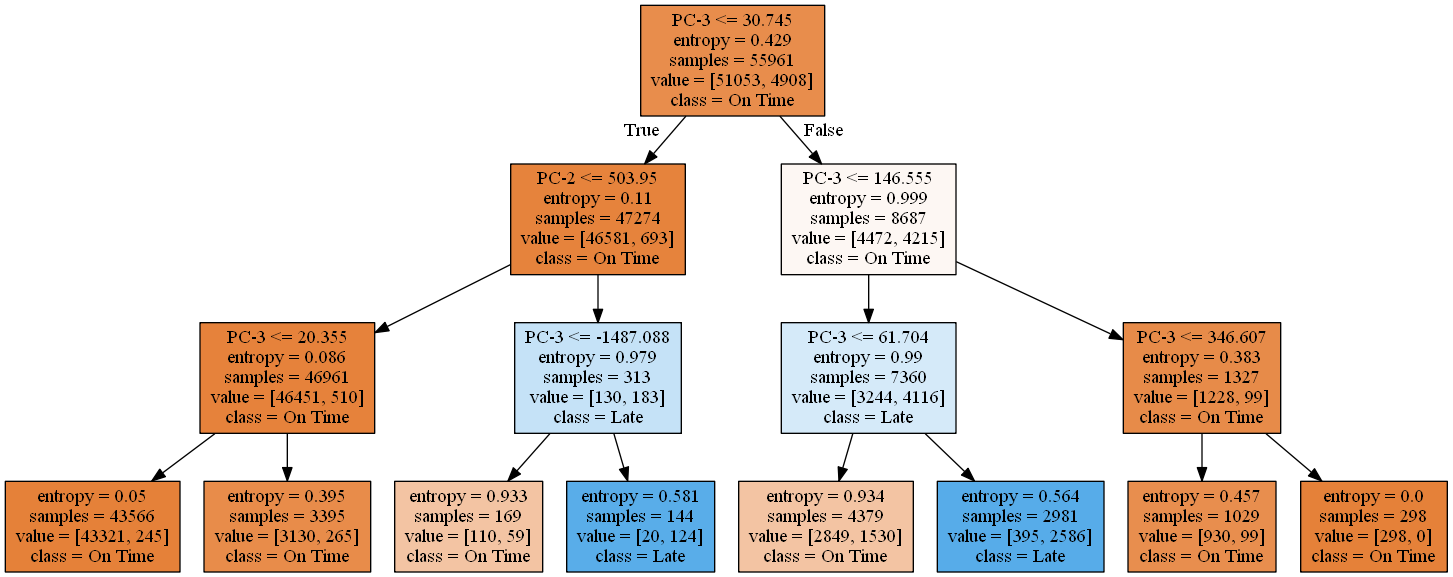

In [312]:
#names = scaled_features_only.iloc[:TRA_INDEX, 1:-2].columns # Names of X features 
names = df_features_pick[sample].columns # Names of X features 

# Render the decision tree
dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names = names, 
    class_names = ['On Time', 'Late'],
    filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [313]:
# Check the prediction power of the model
pred_y = np.array(D_tree_tuned.predict(test_x))
true_y = np.array(test_y)

Confusion matrix, without normalization
[[12613   175]
 [  228  1023]]


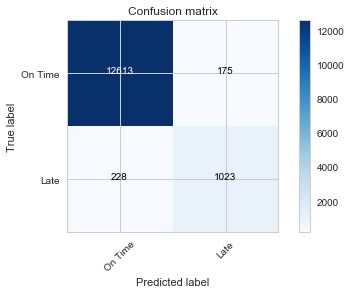

In [314]:
#class_names = ['Labeled 0', 'Labeled 1']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [315]:
target_names = class_names
print(classification_report(true_y, pred_y, target_names=target_names))

             precision    recall  f1-score   support

    On Time       0.98      0.99      0.98     12788
       Late       0.85      0.82      0.84      1251

avg / total       0.97      0.97      0.97     14039



In [316]:
# Metrics computed from a confusion matrix
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

print("===================================================")

print("Overall, how often is the classifier correct (accuracy)? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct (precision)? {}.".format(TP / float(TP + FP))) 

True Positives (TP): We correctly predicted the fraud: 1023. 
True Negatives (TN): we correctly predicted that no fraud: 12613. 
False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: 175. 
False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: 228. 
Overall, how often is the classifier correct (accuracy)? 0.971294251727331. 
Overall, how often is the classifier incorrect? 0.028705748272668995. 
When the actual value is positive, how often is the prediction correct (sensitivity or recall)? 0.8177458033573142.
When the actual value is negative, how often is the prediction correct (specificity)? 0.9863152955896153.
When the actual value is negative, how often is the prediction incorrect (false positive rate)? 0.013684704410384736.
When a positive value is predicted, how often is the prediction correct (precision)? 0.8539232053422371.


## Model Training: Random Forest

In [317]:
#Start the timer as a measure of the computing effort
start_time = time.time()

Random_f = ensemble.RandomForestClassifier()

# Fold Cross validation
score = sklearn.cross_validation.cross_val_score(Random_f, train_x, train_y, cv=CF_no)

# Fold Cross validation
print("Scores of cross fold validation: {}".format(score), " by {} number of foldings ".format(CF_no))

Scores of cross fold validation: [0.98 0.98 0.98 0.98 0.98]  by 5 number of foldings 


In [318]:
Random_f.fit(train_x, train_y)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
#print(Random_f.feature_importances_)

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

--- 3 seconds ---


In [319]:
# Check the prediction power of the model
pred_y = np.array(Random_f.predict(test_x))
true_y = np.array(test_y)

Confusion matrix, without normalization
[[12715    73]
 [  225  1026]]


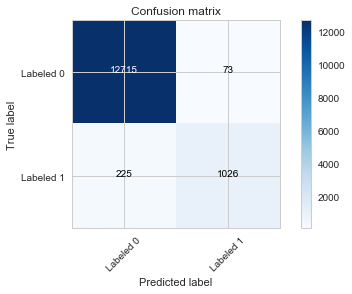

In [320]:
class_names = ['Labeled 0', 'Labeled 1']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [321]:
# Metrics computed from a confusion matrix
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

print("===================================================")

print("Overall, how often is the classifier correct (accuracy)? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct (precision)? {}.".format(TP / float(TP + FP))) 

True Positives (TP): We correctly predicted the fraud: 1026. 
True Negatives (TN): we correctly predicted that no fraud: 12715. 
False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: 73. 
False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: 225. 
Overall, how often is the classifier correct (accuracy)? 0.9787734169100363. 
Overall, how often is the classifier incorrect? 0.021226583089963672. 
When the actual value is positive, how often is the prediction correct (sensitivity or recall)? 0.8201438848920863.
When the actual value is negative, how often is the prediction correct (specificity)? 0.9942915233030967.
When the actual value is negative, how often is the prediction incorrect (false positive rate)? 0.005708476696903347.
When a positive value is predicted, how often is the prediction correct (precision)? 0.9335759781619655.


In [322]:
# Which metrics should you focus on?
# This is the case of fraud detection therefore we should optimize for sensitivity or recall:
# FN is in this case more important as false positives (normal transactions that are marked as possible fraud
# are more acceptable than false negatives where actual fraud has happened and we fail to detect

We try another model.

## Model Training: Naive Bayes

In [323]:
# train_x = features_only[sample]
# test_x = features_only[~sample]
# train_y = df_class.iloc[sample,0]
# test_y = df_class.iloc[~sample,0]

In [324]:
# # Prepare dataframe tables
# X = features_only #.iloc[:, 1:-2].values
# y = df_class.iloc[:,0] #scaled_features_only.iloc[:, -1].values

In [325]:
X_train = train_x
y_train = train_y
X_test = test_x
y_test = test_y

In [326]:
# X_train = scaled_features_only.iloc[:TRA_INDEX, 1:-2].values
# y_train = scaled_features_only.iloc[:TRA_INDEX, -1].values
# X_test = scaled_features_only.iloc[TRA_INDEX:, 1:-2].values
# y_test = scaled_features_only.iloc[TRA_INDEX:, -1].values

In this classification exercise we are also interested in the associated probabilities. These probabilities give us a some kind of confidence on the prediction. However, not all classifiers provide well-calibrated probabilities, some being over-confident while others being under-confident. Thus, a separate calibration of predicted probabilities is often desirable as a postprocessing. Below we use different calibration methods to evaluate the quality of the returned probabilities using Brier’s score.

In [327]:
# Use the Brier score which measures the accuracy of probabilistic predictions. 
# It is applicable to tasks in which predictions must assign probabilities to a set of mutually 
# exclusive discrete outcomes.”
# This function returns a score of the mean square difference between 
# the actual outcome and the predicted probability of the possible outcome. 
# The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual 
# outcome can be a value between 0 and 1.

# The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), 
# the more accurate the prediction is. 
# It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.

#Start the timer as a measure of the computing effort
start_time = time.time()

# Gaussian Naive-Bayes with no calibration
clf = GaussianNB()
clf.fit(train_x, train_y)  # GaussianNB itself does not support sample-weights
prob_pos_clf = clf.predict_proba(test_x)[:, 1]

# Gaussian Naive-Bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf, cv=CF_no, method='isotonic')
clf_isotonic.fit(train_x, train_y) #, sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(test_x)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=CF_no, method='sigmoid')
clf_sigmoid.fit(train_x, train_y) #, sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(test_x)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(test_y, prob_pos_clf) # , sw_test)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(test_y, prob_pos_isotonic) # , sw_test)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(test_y, prob_pos_sigmoid) # , sw_test)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)


#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

Brier scores: (the smaller the better)
No calibration: 0.106
With isotonic calibration: 0.075
With sigmoid calibration: 0.081
--- 0 seconds ---


Based on Brier scores isotoic calibration is working best. 

In [328]:
# # Plot the predicted probabilities
# plt.figure()
# order = np.lexsort((prob_pos_clf, ))
# plt.plot(prob_pos_clf[order], 'r', label='No calibration (%1.3f)' % clf_score)

# plt.plot(prob_pos_isotonic[order], 'g', linewidth=3,
#          label='Isotonic calibration (%1.3f)' % clf_isotonic_score)

# plt.plot(prob_pos_sigmoid[order], 'b', linewidth=3,
#          label='Sigmoid calibration (%1.3f)' % clf_sigmoid_score)

# plt.plot(np.linspace(0, y_test.size, 51)[1::2], y_test[order].reshape(25, -1).mean(1),
#          'k', linewidth=3, label=r'Empirical')

# plt.ylim([-0.05, 1.05])
# plt.xlabel("Instances sorted according to predicted probability "
#            "(uncalibrated GNB)")
# plt.ylabel("P(y=1)")
# plt.legend(loc="upper left")
# plt.title("Gaussian naive Bayes probabilities")

# plt.show()

Below we continue using Naive Bayes caliberated with isotonic method. 

In [329]:
# We see isotonic calibration is performing best and below we run model evaluation on this version of Naive Bayes

y_pred_test = clf_sigmoid.predict(X_test)

#Print the time required to fit and evaluate the model
start_time = time.time()
print("Computational efforts: %s seconds ---" % (time.time() - start_time))

clf_isotonic_accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
clf_isotonic_precision = precision_score(y_pred=y_pred_test, y_true=y_test)
clf_isotonic_recall = recall_score(y_pred=y_pred_test, y_true=y_test)

print("Accuracy: {}. ".format(clf_isotonic_accuracy))
print("Precision: {}. ".format(clf_isotonic_precision))
print("Recall: {}. ".format(clf_isotonic_recall))

Computational efforts: 0.0 seconds ---
Accuracy: 0.9108910891089109. 
Precision: 0.0. 
Recall: 0.0. 


Confusion matrix, without normalization
[[12788     0]
 [ 1251     0]]


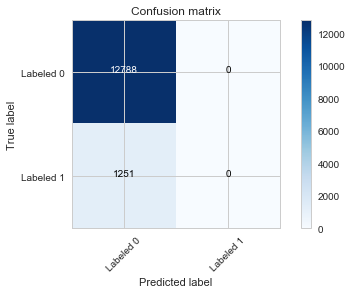

In [330]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

## Model Training: KNeighbors 

In [331]:
# from sklearn import preprocessing, model_selection, neighbors
# from sklearn.metrics import confusion_matrix, average_precision_score

#Start the timer as a measure of the computing effort
start_time = time.time()

KNN = KNeighborsClassifier()  #initialize the KNN classifier

# Create range of values to fit parameters
neighbors = [3,5,7]
weight_sys = ['distance','uniform']
parameters = {'n_neighbors': neighbors, 'weights': weight_sys}

# Fit parameters using gridsearch
clf = GridSearchCV(KNN, param_grid=parameters, cv=CF_no)

#Fit the tunned model on the training set
clf.fit(train_x,train_y)

# Print the best hyperparameters set
print("Best Hyper Parameters:", clf.best_params_)

#Initialize the model on test dataset
clf.fit(test_x, test_y)

# Predict on test dataset
y_pred = clf.predict(test_x)

# Check the prediction power of the model
pred_y = np.array(clf.predict(test_x))
true_y = np.array(test_y)

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

Best Hyper Parameters: {'n_neighbors': 3, 'weights': 'distance'}
--- 14 seconds ---


Confusion matrix, without normalization
[[12788     0]
 [    0  1251]]


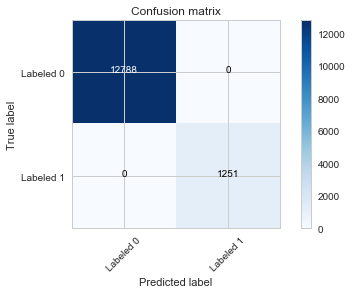

In [332]:
class_names = ['Labeled 0', 'Labeled 1']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [333]:
# Metrics computed from a confusion matrix
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

print("===================================================")

print("Overall, how often is the classifier correct (accuracy)? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct (precision)? {}.".format(TP / float(TP + FP))) 

True Positives (TP): We correctly predicted the fraud: 1251. 
True Negatives (TN): we correctly predicted that no fraud: 12788. 
False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: 0. 
False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: 0. 
Overall, how often is the classifier correct (accuracy)? 1.0. 
Overall, how often is the classifier incorrect? 0.0. 
When the actual value is positive, how often is the prediction correct (sensitivity or recall)? 1.0.
When the actual value is negative, how often is the prediction correct (specificity)? 1.0.
When the actual value is negative, how often is the prediction incorrect (false positive rate)? 0.0.
When a positive value is predicted, how often is the prediction correct (precision)? 1.0.


## Model Training: Support Vector Machine

In [ ]:
# Because of high cost of computation cost we do not tune the parameters here
# Otherwise here are the code in case we can afford it
## parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
## Fit parameters using gridsearch
## svc_tuned = GridSearchCV(svc, parameters, cv=CF_no)

#Start the timer as a measure of the computing effort
start_time = time.time()

# # Initialize and fit the model
svm = SVC(kernel = 'linear')
svm.fit(train_x, train_y)

# Predict on test dataset
y_pred = svm.predict(test_x)

# Check the prediction power of the model
pred_y = np.array(svm.predict(test_x))
true_y = np.array(test_y)

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

In [ ]:
#class_names = ['Labeled 0', 'Labeled 1']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [ ]:
# Metrics computed from a confusion matrix
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

print("===================================================")

print("Overall, how often is the classifier correct (accuracy)? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct (precision)? {}.".format(TP / float(TP + FP))) 

## Model Training: Gradient Boost

In [ ]:
# Here we collect the cross-validation average accuracy 
# for a number of estimators in the range (1, 20). 
# The loss function is the default one (multinomial negative log-likelihood):

Gradient_score_mean = []
max_estimators = 20
for i in range(1, max_estimators):
    score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=5.0/float(i)),
                            test_x, test_y, cv=10, scoring='accuracy').mean()
Gradient_score_mean.append(score)
print("Accuracy: {}".format(Gradient_score_mean))

In [ ]:
# Start the timer as a measure of the computing effort
start_time = time.time()

# We'll make 20 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 20,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
Gradeboost = ensemble.GradientBoostingClassifier(**params)
Gradeboost.fit(train_x, train_y)

# Predict on test dataset
y_pred = clf.predict(test_x)

# Check the prediction power of the model
pred_y = np.array(clf.predict(test_x))
true_y = np.array(test_y)

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % round((time.time() - start_time)))

In [ ]:
#class_names = ['Labeled 0', 'Labeled 1']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [ ]:
# Metrics computed from a confusion matrix
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

print("===================================================")

print("Overall, how often is the classifier correct (accuracy)? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct (precision)? {}.".format(TP / float(TP + FP))) 

## Conclusion 
In this analysis we lightly touched most of the phases of a typical ML life cycle. We started with data source then did some initial processing such as cleaning, format and quality check, transformation and feature selection.

We continued training some of the majors supervised ML models. Then did model evaluation using cross-validation and calculated some performance metrics for each model. We also optimized most of the hyperparameters. However, if we are aiming to develop ML for real life applications, then we need to strike a balance between ML optimization versus software application. At this stage we should avoid building "blackbox" and instead try to ensure our steps are extensible and modular. Pipeline versioning is one such method. 

The purpose of this ML work was to identify an algorithm that can learn from past transaction data. After learning then we produce a model that can be deployed to make intelligent recommendations for the nature of credit card transaction as being fraud or not.

Such fraud is a very rare event given the sheer size of credit card transactions. And fundamentally we like our model to focus on two main errors. One is false positive and the other is false negative. For false positive a transaction that matches the red flags identified in the fraud data profile but the transaction is not a fraudulent transaction. And the financial institution supporting such transactions may have audit procedures in place to address them. However, the more serious problem is the false negative where a transaction that does not match the red flags in the fraud data profile but the transaction is a fraudulent transaction. From a fraud data analytics perspective, false negatives occur due to not understanding the sophistication of concealment as it related to building your fraud data analytics plan. 

Because of the seriousness of false negative results, we here focus on selecting a model that has best sensitivity/recall as its performance metric.

For each of following models we show the percentage of time that the fraud prediction matches with an actual fraud situation:

- Logistic Regression (93%)
- Decision Tree (99%)
- Random Forest (93%)
- Naive - Bayes (Bernoulli) (89%)
- KNeighbors Classifier (100%)
- Support Vector Machine (91%)
- Gradient Boosting Classifier (100%)

From above, the Gradient Boosting and KNeighbors are the top 2 models with zero error of false negative.